# Python Image Generators

Have you tried to load the entire image dataset into numpy arrays? If you tried, you might have realized that it takes over **60GB of RAM**. In this tutorial we'll go over an easy way in Python to get around this problem and load images on the fly from disk (the file itself).

### Prereqs

To get the most out of this tutorial, you should be familiar with the following concepts:

* Basic Python data structures
  * What a list is
  * What a dictionary is
* Functions
  * What a function is
  * How to create and use functions
* List Comprehensions
  * What a list comprehension is
  * How to create a simple list comprehension



In [ ]:
# List
a = [1, 2, 3, 6, 'abc']
print('List:', a)
# Dictionary
b = {1: 32, 'abc': [1, 2, 3]}
print('Dictionary:', b)

# Function
def hello():
    return 'Hello World'
print('Function "hello" returns:', hello())

# List Comprehensions
c = [item + item for item in a]
print('List Comprehension:', c)

## Some Basic Terms

### Iteration and iterables
Iteration is the repetition of some kind of process over and over again. Python's for loop gives us an easy way to iterate over various objects. Often, you'll iterate over a list, but we can also iterate over other Python objects such as strings and dictionaries.

In [ ]:
# Iterating over a list
ez_list = [1, 2, 3]
for i in ez_list:
    print(i)

In [ ]:
# Iterating over a string
ez_string = 'Generators'
for s in ez_string:
    print(s)

In [ ]:
# Iterating over a dictionary
ez_dict = {1 : 'First', 2 : 'Second'}
for key, value in ez_dict.items():
    print(key, value)

In each of the above examples, the `for` loop iterates over the sequence we give it. The code above used a list, string, and dictionary, but you can iterate over tuples and sets as well. In each loop above, we `print` each of the items in the sequence in the order they appear. For example, you can confirm that the order of the `ez_list` is replicated in the order that its items are printed out.

We refer to any object that can support iteration as an **iterable**.

### What defines an iterable?
Iterables support something called the **Iterator Protocol**. The technical definition for the Iterator Protocol is out of the scope of this article, but it can be thought of as a set of *requirements* to be used for a `for` loop. That is to say: lists, strings and dictionaries all follow the Iterator Protocol, therefore we can use them in `for` loops. Conversely, objects that do not follow the protocol cannot be used in a `for` loop. One example of an object that does not follow the protocol is an integer.

If we try to give an integer to a `for` loop, Python will throw an error.

In [ ]:
number = 12345
for n in number:
    print(n)

An integer is just a singular number, not a sequence. You may argue that the "first" number in `number` is 1, but it is not the same as the first item in a sequence. It doesn't make sense to ask "What's after 1?" from `number` since Python only understands integers as a single entities.

Therefore, one of the requirements to be an iterable is to be able to describe to the `for` loop what the next item to perform the operation on is. For example, lists tell the `for` loop that the next item to iterate on is in the index+1 from the current one (1 comes after 0).

Consequently, an iterable must also signal to a `for` loop when to *stop* iterating. This signal usually comes when we arrive at the end of a sequence (i.e. the end of a list or string). We will explore the specific functions that make something iterable later in this article, the important thing to know is that iterables describe *how* a `for` loop should traverse its contents.

Generators are iterables themselves. As you'll see later, `for` loops are one of the main ways we use a generator, so they must be able to support iteration. We'll delve into how we can create our own generators in the next secton.

### Key takeaways: basic terms to know

* Iteration is the idea of repeating some process over a sequence of items. In Python, iteration is usually related to the `for` loop.
* An iterable is an object that supports iteration.
* To be an iterable, it must describe to a for loop two things:
  * What item comes next in the iteration.
  * When should the loop stop iteration.
* Generators are iterables.

## Generators and you

If you've never encountered a generator before, the most common real-life example of a generator is a backup generator, which creates — *generates* — electricity for your house or office.

Conceptually, Python generators generate values *one at a time* from a given sequence, instead of giving the entirety of the sequence at once. This one-at-a-time fashion of generators is what makes them so compatible with `for` loops. If this sounds confusing, don't worry too much. As we explain how to create generators, it will become more clear.

There are two ways to create a generator. They differ in their syntax, but the end result is still a generator. We'll teach these concepts by covering their syntax and comparing them to a similar, but non-generator equivalent.

* A generator *function* versus a regular function
* A generator *expression* versus a list comprehension

### The generator function

A generator function is just like a regular function but with a key difference: the `yield` keyword replaces `return`.

In [ ]:
# Regular function
def function_a():
    return "a"

# Generator function
def generator_a():
    yield "a"

The two functions above perform exactly same action (returning/yielding the same string). However, if you try to inspect the generator function, it won't match what the regular function shows.

In [ ]:
function_a()

In [ ]:
generator_a()

Calling a regular function tells Python to go back to where the function is located in our code, perform the code within the block, and return the result. In order to get the generator function to yield its values, you need to pass it into the `next()` function.

`next()` is a special function that asks, "What's the next item in the iteration?" In fact, `next()` is the precise function that is called when you run a for loop! Lists, dictionaries, strings, and the like all implement `next()`, so this is why you can incorporate them into loops in the first place.

In [ ]:
# Asking the generator what the next item is
next(generator_a())

In [ ]:
# Do not do this
next(generator_a)

Notice that we have to pass in generator function with the parentheses since the function itself is the generator. Providing only the function name will throw an error since you're trying to give `next()` a function name. As expected, the generator function will `yield` 'a' once we invoke the `next()` function.

This example is not fully representative of what a generator is useful for. Remember that generators produce a stream of values, so `yield`ing a single value doesn't really qualify as a stream. To do this, we can actually put in multiple `yield` statements into a generator function. These `yield` statements form the sequence that the generator will output.

We'll create a generator and bind it to a varible `mg`. Then, if we keep passing `mg` into `next()`, we'll get to the next yield. If we keep going past, we'll be given a `StopIteration` error to tell us that the generator has no more values to give. The `StopIteration` error is actually how a `for` loop knows when to stop iterating.

In [ ]:
def multi_generate():
    yield "a"
    yield "b"
    yield "c"

mg = multi_generate()

In [ ]:
print(next(mg))
print(next(mg))
print(next(mg))
print(next(mg))

It's easy to think of generators as a machine that waits for one command and one command only: `next()`. Once you call `next()` on the generator, it will dispense the next value in the sequence it is holding. Otherwise, you can't do much else with a generator. The image below represents our generator as a simple machine.

![](gen_img.jpg)

We've noted that as we keep passing in `mg` into next, we get the other `yield` results. This is possible only if the generator somehow remembers what it last did. This memory is what distinguishes generator functions from regular functions! Once you use a function, it's a one-and-done deal. Once you `return` the value from the function. A generator will keep `yield`ing values until its out.

This brings us to another important property of generators. Once we've finished iterating through them, we can't use them anymore. Once we got through all three `yield` values in `mg`, it can't provide anything to us anymore. We'd have to store another instance of the `multi_generate` generator to begin asking `next()` statements of it again.

## Using Generators for our Image Data

If you're following along with the data on your own computer, you'll need to replace `path_to_train` with the path on your computer to where the train images are located. This will enable Python to find it and all the train images

In [1]:
from glob import glob
import os

path_to_train = './comp-540-spring-2019/train/'
glob_train_imgs = os.path.join(path_to_train, '*_sat.jpg')
glob_train_masks = os.path.join(path_to_train, '*_msk.png')

train_img_paths = glob(glob_train_imgs)
train_mask_paths = glob(glob_train_masks)
print(train_img_paths[:10])
print(train_mask_paths[:10])

['./comp-540-spring-2019/train/7446_sat.jpg', './comp-540-spring-2019/train/31431_sat.jpg', './comp-540-spring-2019/train/1893_sat.jpg', './comp-540-spring-2019/train/47867_sat.jpg', './comp-540-spring-2019/train/27204_sat.jpg', './comp-540-spring-2019/train/23128_sat.jpg', './comp-540-spring-2019/train/2318_sat.jpg', './comp-540-spring-2019/train/32623_sat.jpg', './comp-540-spring-2019/train/4654_sat.jpg', './comp-540-spring-2019/train/36467_sat.jpg']
['./comp-540-spring-2019/train/17067_msk.png', './comp-540-spring-2019/train/52820_msk.png', './comp-540-spring-2019/train/34677_msk.png', './comp-540-spring-2019/train/923_msk.png', './comp-540-spring-2019/train/24476_msk.png', './comp-540-spring-2019/train/27664_msk.png', './comp-540-spring-2019/train/22042_msk.png', './comp-540-spring-2019/train/20622_msk.png', './comp-540-spring-2019/train/46875_msk.png', './comp-540-spring-2019/train/15617_msk.png']


Our generator will work in the following way:
* We iterate over the filenames for the images we want to load
* Open the image file using a library like PIL or scikit-image
* Open the corresponding mask
* Yield the image and mask pair

In [2]:
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

# This will be useful so we can construct the corresponding mask
def get_img_id(img_path):
    img_basename = os.path.basename(img_path)
    img_id = os.path.splitext(img_basename)[0][:-len('_sat')]
    return img_id

# Write it like a normal function
def image_gen(img_paths, img_size=(128, 128)):
    # Iterate over all the image paths
    for img_path in img_paths:
        
        # Construct the corresponding mask path
        img_id = get_img_id(img_path)
        mask_path = os.path.join(path_to_train, img_id + '_msk.png')
        
        # Load the image and mask, and normalize it to 0-1 range
        img = imread(img_path) / 255.
#         mask = rgb2gray()
        # Resize the images
        img = resize(img, img_size, preserve_range=True)
#         mask = resize(mask, img_size, mode='constant', preserve_range=True)
        # Turn the mask back into a 0-1 mask
#         mask = (mask >= 0.5).astype(float)
        
        # Yield the image mask pair
        yield img


Let's test it out! We can use `matplotlib`'s `imshow` to visualize the images.

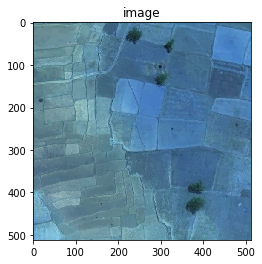

NameError: name 'mask' is not defined

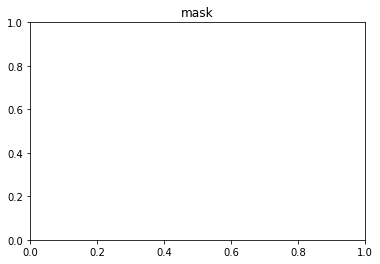

In [13]:
import matplotlib.pyplot as plt
import cv2
for ig in train_img_paths[:2]:
    img = cv2.imread(ig)
    plt.title('image')
    img = cv2.fastNlMeansDenoising(img)
    plt.imshow(img)

    plt.show()
    plt.title('mask')
    plt.imshow(mask, cmap='gray')
    plt.show()

TypeError: Image data cannot be converted to float

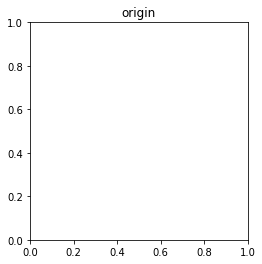

In [15]:
import cv2
import numpy as np
img = cv2.imread('48_sat.jpg', 0)
plt.title('origin')
plt.imshow(img,cmap = 'gray')
x = cv2.Sobel(img,cv2.CV_16S,1,0)
y = cv2.Sobel(img,cv2.CV_16S,0,1)

absX = cv2.convertScaleAbs(x)   # 转回uint8
absY = cv2.convertScaleAbs(y)

dst = cv2.addWeighted(absX,0.5,absY,0.5,0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)



plt.figure(figsize=(20,10))
plt.subplot(2,2,1),plt.imshow(laplacian,cmap=plt.cm.gray)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(dst,cmap = 'gray')
plt.title('sobel weight'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(absX,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(absY,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

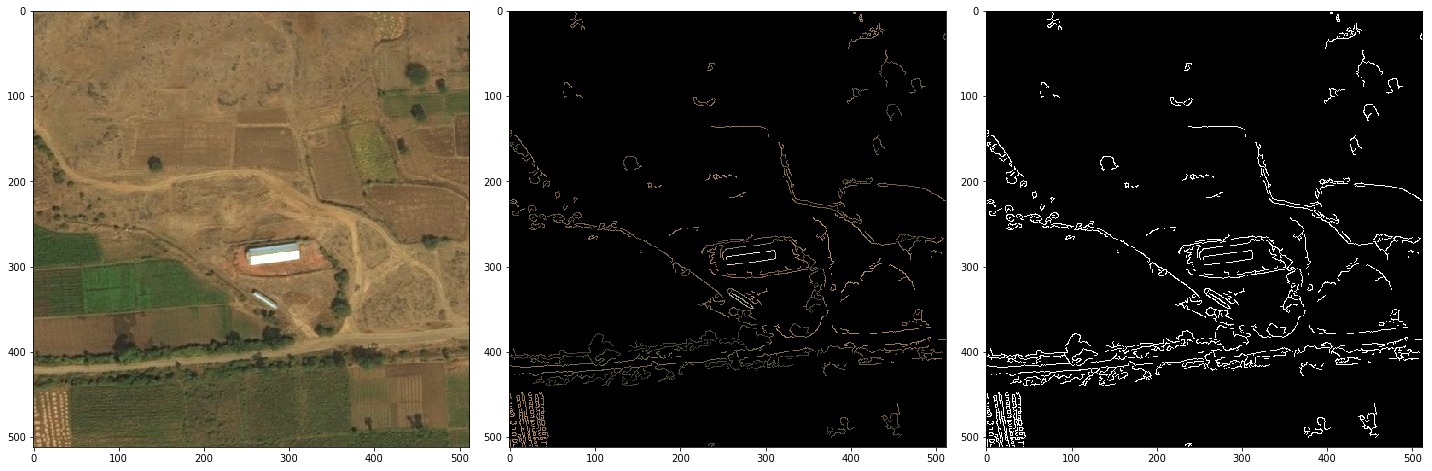

In [33]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
 
def edge_detect(img):
    #高斯模糊,降低噪声
    blurred = cv2.GaussianBlur(img,(3,3),0)
    #灰度图像
    gray = cv2.cvtColor(blurred,cv2.COLOR_RGB2GRAY)
    #图像梯度
    xgrad = cv2.Sobel(gray,cv2.CV_16SC1,1,0)
    ygrad = cv2.Sobel(gray,cv2.CV_16SC1,0,1)
    #计算边缘
    #50和150参数必须符合1：3或者1：2
    edge_output = cv2.Canny(xgrad,ygrad,50,150)
 
    dst = cv2.bitwise_and(img,img,mask=edge_output)
    
    return edge_output, dst
    
    
img = cv2.imread('48_sat.jpg')

edge_output, canny_edge = edge_detect(img.copy())

plt.figure(figsize=(20, 8))

plt.subplot(131)
plt.imshow(img[:,:,::-1])

plt.subplot(132)
plt.imshow(canny_edge[:,:,::-1])

plt.subplot(133)
plt.imshow(edge_output, cmap=plt.cm.gray)

plt.tight_layout()
plt.show()

## Using our Generator with Keras + Tensorflow

So we've just made a python generator to efficiently read our images from our disk rather than loading them all into memory. What do we do with it now? Use it to train a model! To do this we'll be using a deep learning library called Keras, built on top of Tensorflow. If you're not familiar with Tensorflow and Keras, take a look at some of these resources:

* [Keras Tutorials](https://github.com/fchollet/keras-resources)
* [Tensorflow Guide to Keras](https://www.tensorflow.org/guide/keras)
* [Building a U-Net in Keras](https://www.kaggle.com/keegil/keras-u-net-starter-lb-0-277)

If you want to learn more about deep learning and convolutional neural networks, take a look at these resources:

* [Stanford CS231n Course Notes](http://cs231n.github.io/)
* [Stanford CS231n ConvNet Notes](http://cs231n.github.io/convolutional-networks/)
* [An Intuitive Explanation of ConvNets](https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/)

**NOTE: The model below will not produce good results, it's just meant to give you an example of the Keras workflow. To make models that will actually work, see the links above**

In [21]:
# Create simple model
from keras.layers import Conv2D, Reshape
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(64, 5, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(128, 5, activation='relu', padding='same'))
model.add(Conv2D(1, 5, activation='sigmoid', padding='same'))
model.add(Reshape((128, 128)))

ModuleNotFoundError: No module named 'keras'

In [ ]:
import keras.backend as K
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

smooth = 1e-9

# This is the competition metric implemented using Keras
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred = K.cast(y_pred, 'float32')
    y_pred_f = K.cast(K.greater(K.flatten(y_pred), 0.5), 'float32')
    intersection = y_true_f * y_pred_f
    score = 2. * (K.sum(intersection) + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

# We'll construct a Keras Loss that incorporates the DICE score
def dice_loss(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1. - (2. * intersection + 1.) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.)


def bce_dice_loss(y_true, y_pred):
    return 0.5 * binary_crossentropy(y_true, y_pred) + dice_coef(y_true, y_pred)

model.compile(Adam(lr=0.01), loss=bce_dice_loss, metrics=[dice_coef])

### Keras `fit_generator`

Keras follows a similar API to the famous python machine learning library, Scikit-Learn. A Keras model comes with a `fit` method that trains the model using some training data. Since training neural networks on image data often involves data that can be quite memory-intensive, Keras also includes a `fit_generator` method that takes as input a python generator of all the image data. Good thing we know how to make one!

See the documentation for [`fit_generator`](https://keras.io/models/sequential/#fit_generator)

In [ ]:
import numpy as np

# Keras takes its input in batches 
# (i.e. a batch size of 32 would correspond to 32 images and 32 masks from the generator)
# The generator should run forever
def image_batch_generator(img_paths, batchsize=32):
    while True:
        ig = image_gen(img_paths)
        batch_img, batch_mask = [], []
        
        for img, mask in ig:
            # Add the image and mask to the batch
            batch_img.append(img)
            batch_mask.append(mask)
            # If we've reached our batchsize, yield the batch and reset
            if len(batch_img) == batchsize:
                yield np.stack(batch_img, axis=0), np.stack(batch_mask, axis=0)
                batch_img, batch_mask = [], []
        
        # If we have an nonempty batch left, yield it out and reset
        if len(batch_img) != 0:
            yield np.stack(batch_img, axis=0), np.stack(batch_mask, axis=0)
            batch_img, batch_mask = [], []    

In [ ]:
from sklearn.model_selection import train_test_split

BATCHSIZE = 32

# Split the data into a train and validation set
train_img_paths, val_img_paths = train_test_split(train_img_paths, test_size=0.15)

# Create the train and validation generators
traingen = image_batch_generator(train_img_paths, batchsize=BATCHSIZE)
valgen = image_batch_generator(val_img_paths, batchsize=BATCHSIZE)

def calc_steps(data_len, batchsize):
    return (data_len + batchsize - 1) // batchsize

# Calculate the steps per epoch
train_steps = calc_steps(len(train_img_paths), BATCHSIZE)
val_steps = calc_steps(len(val_img_paths), BATCHSIZE)

# Train the model
history = model.fit_generator(
    traingen, 
    steps_per_epoch=train_steps, 
    epochs=2, # Change this to a larger number to train for longer
    validation_data=valgen, 
    validation_steps=val_steps, 
    verbose=1,
    max_queue_size=5  # Change this number based on memory restrictions
)

In [ ]:
import pandas as pd

# Plot the training curve
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(title="Loss", logy=True)
pd.DataFrame(history.history)[['dice_coef', 'val_dice_coef']].plot(title="Dice")